In [24]:
import pandas as pd
import numpy as np
import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
filepath = r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Worksheets\Datasets\IMDB Dataset.csv"
df = pd.read_csv(filepath)
length_before_sampling = len(df)

print(f"There are {length_before_sampling} reviews in the dataset")
df.head()

There are 50000 reviews in the dataset


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
#Sampling 1000 entries only for the model training
df = df.sample( n = 1000)
length_after_sampling = len(df)
print(f"There are {length_after_sampling} reviews in the dataset")

There are 1000 reviews in the dataset


sentiment
positive    504
negative    496
Name: count, dtype: int64

In [11]:
df.head()

,review,sentiment
36623,It doesn't matter whether you've experienced t...,positive
3689,The other lowest-rating reviewers have summed ...,negative
38003,I liked this movie. When the guy who was in on...,positive
9864,I am decidedly not in the target audience for ...,positive
38914,One of the worst shows of all time. The show w...,negative


In [10]:
df['sentiment'].value_counts()

sentiment
positive    504
negative    496
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36623 to 39397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [12]:
corpus = []
for i in range(0, length_after_sampling):
    review = re.sub("[^a-zA-Z]", " ", df.iloc[i]["review"])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)


In [13]:
df_copy = df.copy()
df_copy["CleanedText"] = corpus
df_copy.head()

,review,sentiment,CleanedText
36623,It doesn't matter whether you've experienced t...,positive,matter whether experienc plight elderli americ...
3689,The other lowest-rating reviewers have summed ...,negative,lowest rate review sum sewag perfectli seem li...
38003,I liked this movie. When the guy who was in on...,positive,like movi guy bank heist million gold die cell...
9864,I am decidedly not in the target audience for ...,positive,decidedli target audienc film man nearli recen...
38914,One of the worst shows of all time. The show w...,negative,one worst show time show would begin smart ass...


In [14]:
df_copy["sentiment"].nunique()

2

In [15]:
X = df_copy.loc[:, "CleanedText"].values
y = df_copy.loc[:, "sentiment"].values

In [16]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X).toarray()

In [17]:
#Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state= 42)

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)
y_pred = [1 if label == "positive" else 0 for label in y_pred]
y_test = [1 if label == "positive" else 0 for label in y_test]
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.84
classification Report:                precision    recall  f1-score   support

           0       0.84      0.85      0.84       128
           1       0.84      0.83      0.83       122

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [20]:
#ROC AUC score 
roc_auc_value = roc_auc_score(y_test, y_pred)
print("ROC AUC Score: ", roc_auc_value)

#Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

ROC AUC Score:  0.8397156762295082
Confusion Matrix: 
 [[109  19]
 [ 21 101]]


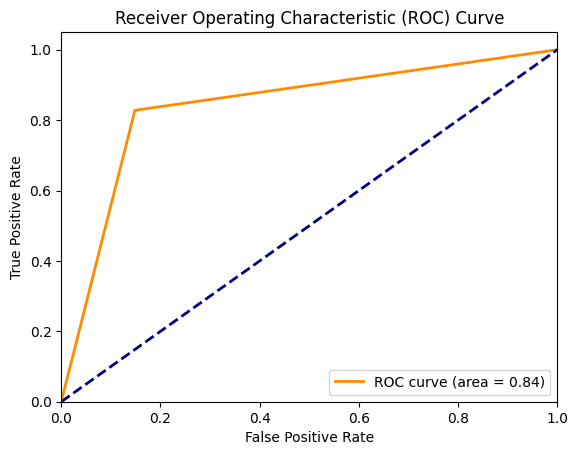

In [25]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()